## Context
source: [1]
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
A dataset containing 918 observations is available (heart.csv). This dataset contains 11 features that can be used to predict a possible heart disease:

    1. Age: age of the patient [years]
    2. Sex: sex of the patient [M: Male, F: Female]
    3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    4. RestingBP: resting blood pressure [mm Hg]
    5. Cholesterol: serum cholesterol [mm/dl]
    6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes’ criteria]
    8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
    11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    12. HeartDisease: output class [1: heart disease, 0: Normal]


## Assignment
Create a machine learning model that is able to predict a possible heart disease for a patient with a high accuracy. The model must be created using a Support Vector Machine. Experiment with different kernel types and kernel parameters to achieve the highest accuracy. Take the following into account:
    - Some parameters must be transformed from categorical (e.g. male - female) to numerical in order for the SVM to process. This could be handled one hot encoding. See https://www.geeksforgeeks.org/ml-one-hot-encoding/ or other websites on this topic
    - Scaling of the numerical parameters will most likely be necessary.
    - Use *classification_report, confusion_matrix and ConfusionMatrixDisplay* from **sklearn.metrics** to investigate the performance of your model. The terms precision, recall and F1 score that are used in the classification report are explained in https://en.wikipedia.org/wiki/Precision_and_recall.
    - Don’t forget to split the dataset into a training set and a test set for validation purposes.

In [54]:
# imports 
import numpy as np
import pandas as pd
import sklearn as sk

In [55]:
data = pd.read_csv('heart.csv')
# print(data)

In [56]:
# get the unique data from column sex, chestPainType, restingECG, exerciseAngina and st_Slope
print(data['Sex'].unique()) 
print(data['ChestPainType'].unique()) 
print(data['RestingECG'].unique()) 
print(data['ExerciseAngina'].unique()) 
print(data['ST_Slope'].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [57]:
# One hot Encoding using pandas
oneHotData = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']) # , dtype=int
oneHotData['Sex_F'] = oneHotData['Sex_F'].astype(int)
oneHotData['Sex_M'] = oneHotData['Sex_M'].astype(int)
oneHotData['ChestPainType_ASY'] = oneHotData['ChestPainType_ASY'].astype(int)
oneHotData['ChestPainType_ATA'] = oneHotData['ChestPainType_ATA'].astype(int)
oneHotData['ChestPainType_NAP'] = oneHotData['ChestPainType_NAP'].astype(int)
oneHotData['ChestPainType_TA'] = oneHotData['ChestPainType_TA'].astype(int)
oneHotData['RestingECG_LVH'] = oneHotData['RestingECG_LVH'].astype(int)
oneHotData['RestingECG_Normal'] = oneHotData['RestingECG_Normal'].astype(int)
oneHotData['RestingECG_ST'] = oneHotData['RestingECG_ST'].astype(int)
oneHotData['ExerciseAngina_N'] = oneHotData['ExerciseAngina_N'].astype(int)
oneHotData['ExerciseAngina_Y'] = oneHotData['ExerciseAngina_Y'].astype(int)
oneHotData['ST_Slope_Down'] = oneHotData['ST_Slope_Down'].astype(int)
oneHotData['ST_Slope_Flat'] = oneHotData['ST_Slope_Flat'].astype(int)   
oneHotData['ST_Slope_Up'] = oneHotData['ST_Slope_Up'].astype(int)
# print(oneHotData)


In [58]:
# training and testing
from sklearn.model_selection import train_test_split

X = oneHotData.drop('HeartDisease', axis=1)
y = oneHotData['HeartDisease']
# print('ClassLabels: \n', np.unique(y))
# print(np.bincount(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # , stratify = y

print(np.bincount(y_train))

[295 347]


In [59]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Number of wrong classifications: ', (y_test != y_pred).sum())
print('The accuracy of SVM : %.2f' %((y_test == y_pred).sum() / len(y_test)))

Number of wrong classifications:  30
The accuracy of SVM : 0.89


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       115
           1       0.91      0.90      0.91       161

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

[[101  14]
 [ 16 145]]


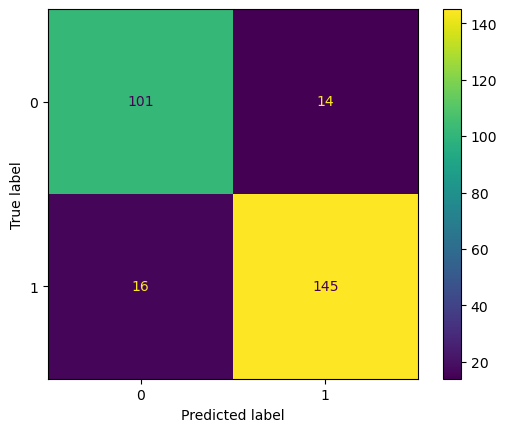

In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))
conmat = confusion_matrix(y_test, y_pred)
print(conmat)
disp = ConfusionMatrixDisplay(conmat)
disp.plot()